In [4]:
a = np.load('_testaccuracies.pkl', allow_pickle=1)

In [5]:
a

{(1, 1): 83.70625000000001,
 (1, 2): 82.55,
 (1, 3): 82.23125,
 (1, 4): 81.36875,
 (1, 5): 81.58125000000001,
 (1, 6): 81.35,
 (1, 7): 80.61874999999999,
 (1, 8): 80.33125}

In [1]:
import numpy as np
from numpy.random import choice, random
import pandas as pd
import matplotlib.pyplot as plt
from multisensory_playbook import detection_params_search_test, DetectionTask, DetectionTask_versatile, Task, Trials

In [30]:
repeats = 1
nb_steps=90


pm = 1
pe = 0.2 
pn = 0.2 # smaller = less noisy (more zeros)
pc = 0.6 #0.3
pi = 0.3 #0.6 
M = 1
time_dep = 1           
k = 2
task = DetectionTask_versatile(pm=pm, pe=pe, pn=pn, pc=pc, pi=pi, time_dep=time_dep, k=k)

etrials = task.generate_trials(nb_trials=repeats, nb_steps=nb_steps)

[13 17 21 31 38 44 47 49 52 57 59 61 62 73 75 80 83 88 89]


Time dependency detected: Significant autocorrelation at lags [1]


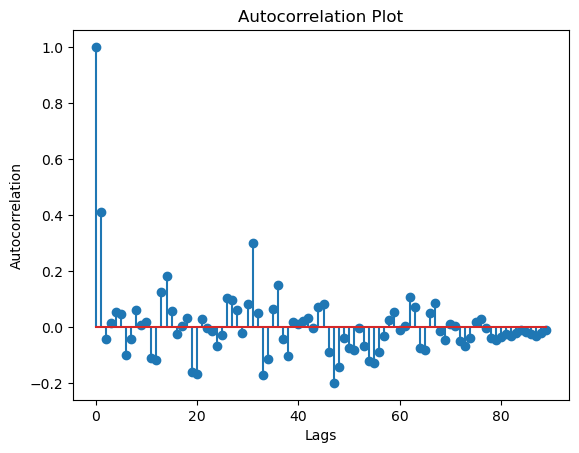

In [31]:
import numpy as np
import matplotlib.pyplot as plt

def autocorrelation(array):
    n = len(array)
    mean = np.mean(array)
    var = np.var(array)
    autocorr = np.correlate(array - mean, array - mean, mode='full')[-n:] / (var*n)
    return autocorr

def check_time_dependency(autocorr_values, max_lag=3, threshold=0.3):
    # Check only up to specified max_lag, exclude the first lag (lag 0)
    significant_lags = np.where((autocorr_values[1:max_lag+1] > threshold) | (autocorr_values[1:max_lag+1] < -threshold))[0]
    if len(significant_lags) > 0:
        print("Time dependency detected: Significant autocorrelation at lags", significant_lags + 1)
    else:
        print("No significant time dependency detected within the first", max_lag, "lags.")

# Example usage
array = etrials.E[0]
autocorr_values = autocorrelation(array)
check_time_dependency(autocorr_values)

# Plotting the autocorrelation
lags = np.arange(len(array))
plt.stem(lags, autocorr_values)
plt.xlabel('Lags')
plt.ylabel('Autocorrelation')
plt.title('Autocorrelation Plot')
plt.show()
